<a href="https://colab.research.google.com/github/stsan9/AnomalyDetection4Jets/blob/master/Machine_Learning_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
                                 import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from random import sample 
import statistics
from datetime import datetime

In [0]:
# Mount the google drive file system
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
path = '/content/gdrive/My Drive/McAuley/EndoMondoSportsTable.csv'
dataframe = pd.read_csv(path)
dataframe.head(2)

,longitude,altitude,latitude,sport,id,heart_rate,timestamp,userId,derived_distance (km),total_time,dervided_speed (km/h),average_altitude,average_heart_rate,time_start,gender_female,gender_male,gender_unknown
0,"[24.64977040886879, 24.65014273300767, 24.6509...","[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....","[60.173348765820265, 60.173239801079035, 60.17...",1,396826535,"[100, 111, 120, 119, 120, 116, 125, 128, 131, ...","[1408898746, 1408898754, 1408898765, 140889877...",10921915,52.909534,2.108056,25.098738,43.0712,152.65,1408898746,0,1,0
1,"[24.649855233728886, 24.65015547350049, 24.650...","[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....","[60.173247596248984, 60.17320962622762, 60.172...",1,392337038,"[100, 105, 111, 110, 108, 115, 126, 130, 132, ...","[1408221682, 1408221687, 1408221699, 140822170...",10921915,32.382759,1.233333,26.256291,35.7248,147.71,1408221682,0,1,0


In [0]:
def time_scale(num):
  return num/60/60

In [0]:
all_users=dataframe["userId"].unique()
saved_stamps = list(dataframe['time_start'])
times = []
for user in all_users:
  user_data = dataframe.loc[dataframe["userId"] == user].sort_values("time_start")
  arr = np.diff(user_data["time_start"])
  arr=np.append(arr,[0])
  user_data["time_start"]=arr.tolist()
  indexNames = dataframe[dataframe["userId"] == user].index
  dataframe.drop(indexNames,inplace=True)
  dataframe = dataframe.append(user_data,ignore_index = True)

dataframe = dataframe.rename( columns= { "time_start" : "hrs_to_next" } )
dataframe['time_start'] = saved_stamps
dataframe['hrs_to_next'] = dataframe['hrs_to_next'].apply(time_scale)

In [0]:
df = dataframe.copy()
df = df[df['hrs_to_next'] != 0]
median_gap = np.median(df['hrs_to_next'])
print(median_gap/24)

1.9372280092592593


In [0]:
#Converting hrs_to_next to month ranges
def hrs_to_month(num):
  return num/24/30
dataframe["months_to_next"]=dataframe["hrs_to_next"].apply(hrs_to_month)

In [0]:
#Converting time_start to number of month
def extract_month(num):
  date=datetime.fromtimestamp(num)
  return date.month
dataframe["month"]=dataframe["time_start"].apply(extract_month)

In [0]:
user_time_table = pd.DataFrame(columns=['userId', 'median_hrs_to_next', 'workout_in_median'])

variable_dict = {'user_median': [], 'recent_workouts': [], 'workout_soon': [], 'recent_sport': [], 'recent_heart_rate': [], 'recent_speed': [], 'recent_distance': [],
                 'recent_altitude': [], 'good_users': [], 'hrs_to_next1': [], 'hrs_to_next2': [], 'gender_female': [], 'gender_male': [], 'gender_unknown': [], 'months_to_next1': [],
                 'months_to_next2': [], 'recent_month1': [], 'recent_month2': [], 'time_int_deviation': []}

for user in all_users:
  user_data = dataframe.loc[dataframe["userId"] == user].loc[dataframe['hrs_to_next'] != 0].sort_values("time_start", ascending=False)
  user_data['time_int_deviation'] = pd.DataFrame.std(user_data.hrs_to_next)   # calculate time deviation per user here
  if len(user_data) >= 20:
    variable_dict['good_users'].append(user)
    variable_dict['user_median'].append(np.median(user_data['hrs_to_next']))
    workouts = user_data[user_data['time_start'] >= (user_data['time_start'].iloc[1] - median_gap*60*60)]
    variable_dict['recent_workouts'].append(len(workouts) - 2)
    variable_dict['recent_sport'].append(user_data['sport'].iloc[1])
    variable_dict['workout_soon'].append(int(user_data['hrs_to_next'].iloc[1] <= median_gap))
    variable_dict['recent_heart_rate'].append(user_data['average_heart_rate'].iloc[1])
    variable_dict['recent_speed'].append(user_data['dervided_speed (km/h)'].iloc[1])
    variable_dict['recent_distance'].append(user_data['derived_distance (km)'].iloc[1])
    variable_dict['recent_altitude'].append(user_data['average_altitude'].iloc[1])
    variable_dict['hrs_to_next1'].append(user_data['hrs_to_next'].iloc[2])
    variable_dict['hrs_to_next2'].append(user_data['hrs_to_next'].iloc[3])
    variable_dict['months_to_next1'].append(user_data['months_to_next'].iloc[2])
    variable_dict['months_to_next2'].append(user_data['months_to_next'].iloc[3])
    variable_dict['gender_female'].append(user_data['gender_female'].iloc[1])
    variable_dict['gender_male'].append(user_data['gender_male'].iloc[1])
    variable_dict['gender_unknown'].append(user_data['gender_unknown'].iloc[1])
    variable_dict['recent_month1'].append(user_data['month'].iloc[2])
    variable_dict['recent_month2'].append(user_data['month'].iloc[3])
    variable_dict['time_int_deviation'].append(user_data['time_int_deviation'].iloc[1])

user_time_table = pd.DataFrame.from_dict(variable_dict)

In [0]:
user_time_table

,user_median,recent_workouts,workout_soon,recent_sport,recent_heart_rate,recent_speed,recent_distance,recent_altitude,good_users,hrs_to_next1,hrs_to_next2,gender_female,gender_male,gender_unknown,months_to_next1,months_to_next2,recent_month1,recent_month2,time_int_deviation
0,71.240139,0,0,1,133.150,21.559784,71.566504,25.613600,10921915,0.637222,189.626111,0,1,0,0.000885,0.263370,8,8,122.811904
1,83.151667,0,0,3,158.360,15.441569,16.110704,38.309200,4969375,42.661389,1.004444,0,1,0,0.059252,0.001395,3,2,154.344158
2,48.513056,0,1,1,129.540,19.769798,25.211984,18.770000,430859,25.537222,263.652222,0,1,0,0.035468,0.366184,7,7,1052.916741
3,170.656667,0,0,5,164.216,12.761924,11.974939,349.229566,279317,457.178056,310.076111,1,0,0,0.634970,0.430661,6,5,1676.756945
4,83.536250,0,0,3,155.834,11.850943,15.498399,618.792000,3905196,133.382500,124.712500,0,1,0,0.185253,0.173212,12,10,4890.654515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,44.947917,0,1,3,158.080,12.843435,6.393176,63.724000,4101,49.293056,25.586389,0,1,0,0.068463,0.035537,4,4,909.842827
876,73.405694,1,1,1,135.606,19.431514,80.370900,74.558118,1875839,43.576667,13.663611,0,1,0,0.060523,0.018977,7,7,106.096150
877,334.048889,0,0,3,154.418,9.522620,10.268559,724.509600,3743021,70.734444,168.317500,0,1,0,0.098242,0.233774,8,8,1738.123009
878,50.630139,1,0,3,134.726,12.025299,14.874627,9.969200,431375,9537.523333,10120.676111,0,1,0,13.246560,14.056495,12,12,948.297247


In [0]:
x = user_time_table.iloc[:, [0, 5, 6, 7, 8, 9, 14, 15, 16]].values
y = user_time_table.iloc[:, 2].values

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

# Hide

In [0]:
#@title SVM Model (RBF Kernel)


In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = classifier.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(cm[0][0])
print(cm[1][1])
print(cm[0][1])
print(cm[1][0])
print("SVM Accuracy (RBF): " + str((cm[0][0]+cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[0][1])*100) + "%")

[[116   4]
 [ 48   8]]
116
8
4
48
SVM Accuracy (RBF): 72.09302325581395%


In [0]:
#@title SVM Model (Linear Kernel)


In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = classifier.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(cm[0][0])
print(cm[1][1])
print(cm[0][1])
print(cm[1][0])
print("SVC Accuracy (Linear): " + str((cm[0][0]+cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[0][1])*100) + "%")

[[120   0]
 [ 56   0]]
120
0
0
56
SVC Accuracy (Linear): 68.18181818181817%


In [0]:
#@title KNN Model


In [0]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = classifier.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(cm[0][0])
print(cm[1][1])
print(cm[0][1])
print(cm[1][0])
print("KNN Accuracy: " + str((cm[0][0]+cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[0][1])*100) + "%")

[[103  17]
 [ 36  20]]
103
20
17
36
KNN Accuracy: 71.09826589595376%


# Logistic Regression


In [0]:
#@title Logistic Regression Model


In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = classifier.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(cm[0][0])
print(cm[1][1])
print(cm[0][1])
print(cm[1][0])
print("Logistic Regression Accuracy: " + str((cm[0][0]+cm[1][1])/(cm[0][1]+cm[1][0]+cm[0][0]+cm[0][1])*100) + "%")

[[117   3]
 [ 42  14]]
117
14
3
42
Logistic Regression Accuracy: 79.39393939393939%


In [0]:
#Our Check: check if each user has a median time gap <= the median time gap of all users
count = 0
for i in range(len(user_time_table['workout_soon'])):
 if user_time_table['user_median'][i] <= median_gap and user_time_table['workout_soon'][i] == 1:
   count += 1
 if user_time_table['user_median'][i] > median_gap and user_time_table['workout_soon'][i] == 0:
   count += 1
print('Baseline Percent Accuracy: ' + str((count/len(user_time_table)) * 100) + '%')

Baseline Percent Accuracy: 69.54545454545455%


In [0]:
#McAuley Check: see if the second to last workout was in the median time gap
count = 0
for i in range(len(user_time_table['workout_soon'])):
 if user_time_table['hrs_to_next1'][i] <= median_gap and user_time_table['workout_soon'][i] == 1:
   count += 1
 if user_time_table['hrs_to_next1'][i] > median_gap and user_time_table['workout_soon'][i] == 0:
   count += 1
print('Baseline Percent Accuracy: ' + str((count/len(user_time_table)) * 100) + '%')

Baseline Percent Accuracy: 66.81818181818183%


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


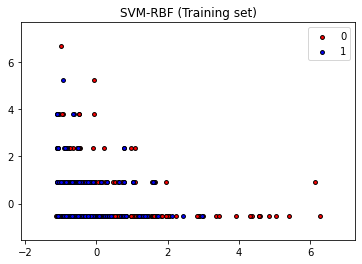

In [0]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j, s=15, edgecolors='k')
plt.title('SVM-RBF (Training set)')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


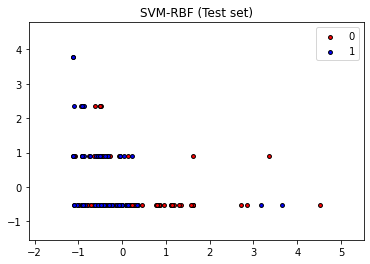

In [0]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j, s=15, edgecolors='k')
plt.title('SVM-RBF (Test set)')
plt.legend()
plt.show()